<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Content-based Course Recommender System Using User Profile and Course Genres**


Estimated time needed: **60** minutes


The most common type of content-based recommendation system is to recommend items to users based on their profiles. The user's profile revolves around that user's preferences and tastes. It is shaped based on user ratings, including the number of times a user has clicked on different items or liked those items.

The recommendation process is based on the similarity between those items. The similarity or closeness of items is measured based on the similarity in the content of those items. When we say content, we're talking about things like the item's category, tag, genre, and so on. Essentially the features about an item.


For online course recommender systems, we already know how to extract features from courses (such as genres or BoW features). Next, based on the course genres and users' ratings, we want to further build user profiles (if unknown). 

A user profile can be seen as the user feature vector that mathematically represents a user's learning interests.


With the user profile feature vectors and course genre feature vectors constructed, we can use several computational methods, such as a simple dot product, to compute or predict an interest score for each course and recommend those courses with high interest scores.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/user_profile_score.png)


## Objectives


After completing this lab you will be able to:


* Generate a user profile based on course genres and rating
* Generate course recommendations based on a user's profile and course genres


----


## Prepare and setup the lab environment


First, let's install and import the required packages.


In [1]:
#%pip install scikit-learn
#%pip install pandas

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
# also set a random state
rs = 123

### Lets generate user profiles using course genres and ratings


Suppose we have a very simple course genre dataset that contains only three genres: `Python`, `Database`, and `MachineLearning`.  

We also have two courses: `Machine Learning with Python` and `SQL Learning with Python` and their genres as follows:


In [4]:
course_genres = ['Python', 'Database', 'MachineLearning']
courses = [['Machine Learning with Python', 1, 0, 1], ["SQL with Python", 1, 1, 0]]
courses_df = pd.DataFrame(courses, columns = ['Title'] + course_genres)
courses_df

,Title,Python,Database,MachineLearning
0,Machine Learning with Python,1,0,1
1,SQL with Python,1,1,0


As we can see from the dataset:
- Course `Machine Learning with Python` has `Python` and `MachineLearning` genres
- Course `SQL with Python` has `Python` and `Database` genres


Then let's create another simple user rating dataframe containing the ratings from two users.


In [5]:
users = [['user0', 'Machine Learning with Python', 3], ['user1', 'SQL with Python', 2]]
users_df = pd.DataFrame(users, columns = ['User', 'Title', 'Rating'])
users_df

,User,Title,Rating
0,user0,Machine Learning with Python,3
1,user1,SQL with Python,2


Suppose **user0** rated `Machine Learning with Python` as 3 (completed with a certificate)  and **user1** rated `SQL with Python` as 2 (just audited or not completed).

Based on their course ratings and course genres. Can we generate a profile vector for each user?


Intuitively, since user0 has completed the course `Machine Learning with Python`, they should be interested in those genres associated with the course, i.e.,Machine Learning and Python. 

On the other hand, user0 has not taken the `SQL with Python` so it is likely they are not interested in the database genre.


To quantify such user interests, we could multiply user0's rating vector with a course genre matrix and get the weighted genre's vector for the courses:


In [6]:
# User 0 rated course 0 as 3 and course 1 as 0/NA (unknown or not interested)
u0 = np.array([[3, 0]])

In [7]:
# The course genre's matrix
C = courses_df[['Python', 'Database', 'MachineLearning']].to_numpy()

Before multiple them, let's first print their shapes:


In [8]:
print(f"User profile vector shape {u0.shape} and course genre matrix shape {C.shape}")

User profile vector shape (1, 2) and course genre matrix shape (2, 3)


If we multiple a $1 x 2$ vector with a $2 x 3$ matrix, we will get a 1 x 3 vector representing the user profile vector.


$$u_0C = \begin{bmatrix} 3 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 & 1 \\\\\\\\ 1 & 1 & 0 \end{bmatrix}$$


In [9]:
u0_weights = np.matmul(u0, C)
u0_weights

array([[3, 0, 3]])

In [10]:
course_genres

['Python', 'Database', 'MachineLearning']

Let's take a look at the result. This `u0_weights` is also called the weighted genre vector and represents the interests of the user for each genre based on the courses they have rated. As we can see from the results, user0 seems interested in `Python` and `MachineLearning` with a rating of 3.


Similarly, we can calculate the weighted genre matrix for user 1:


$$u_1C = \begin{bmatrix} 0 & 2 \end{bmatrix} \begin{bmatrix} 1 & 0 & 1 \\\\\\\\ 1 & 1 & 0 \end{bmatrix}$$


In [11]:
# User 1 rated course 0 as 0 (unknown or not interested) and course 1 as 2
u1 = np.array([[0, 2]])

In [12]:
u1_weights = np.matmul(u1, C)
u1_weights

array([[2, 2, 0]])

As we can see from the `u1_weights` vector, user1 seems very interested in `Python` and `Database` with a value 2.


Let's combine the two weighted genre vectors and create a user profile dataframe:


In [13]:
weights = np.concatenate((u0_weights.reshape(1, 3), u1_weights.reshape(1, 3)), axis=0)
profiles_df = pd.DataFrame(weights, columns=['Python', 'Database', 'MachineLearning'])
profiles_df.insert(0, 'user', ['user0', 'user1'])

In [14]:
profiles_df

,user,Python,Database,MachineLearning
0,user0,3,0,3
1,user1,2,2,0


Now this `profiles_df` clearly shows the user profiles or course interests.


### Generate recommendation scores for some new courses


With the user profiles generated, we can see that `user0` is very interested in Python and machine learning, and `user1` is very interested in Python and database.


Now, suppose we published some new courses titled as `Python 101`, `Database 101`, and `Machine Learning with R`:


In [15]:
new_courses = [['Python 101', 1, 0, 0], ["Database 101", 0, 1, 0], ["Machine Learning with R", 0, 0, 1]]
new_courses_df = pd.DataFrame(new_courses, columns = ['Title', 'Python', 'Database', 'MachineLearning'])
new_courses_df

,Title,Python,Database,MachineLearning
0,Python 101,1,0,0
1,Database 101,0,1,0
2,Machine Learning with R,0,0,1


Next, how can we calculate a recommendation score for each new course with respect to `user0` and `user1`, using user profile vectors and genre vectors?


One simple but effective way is to apply the dot product to the user profile vector and course genre vector (as they always have the same shape). Since we have two users and three courses, we need to perform a matrix multiplication:


In [16]:
profiles_df

,user,Python,Database,MachineLearning
0,user0,3,0,3
1,user1,2,2,0


Let's convert the course genre dataframe into a 2-D numpy array:


In [17]:
# Drop the title column
new_courses_df = new_courses_df.loc[:, new_courses_df.columns != 'Title']
course_matrix = new_courses_df.values
course_matrix

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [18]:
# course matrix shape
course_matrix.shape

(3, 3)

As we can see from the above output, the course matrix is a `3 x 3` matrix and each row vector is a course genre vector.


Then we can convert the user profile dataframe into another 2-d numpy array:


In [19]:
# Drop the user column
profiles_df = profiles_df.loc[:, profiles_df.columns != 'user']
profile_matrix = profiles_df.values
profile_matrix

array([[3, 0, 3],
       [2, 2, 0]])

In [20]:
profile_matrix.shape

(2, 3)

The profile matrix is a 2 x 3 matrix and each row is a user profile vector:


If we multiply the course matrix and the user profile matrix, we can get the 2 x 3 course recommendation matrix with each element `(i, j)` representing a recommendation score of course `i` to user `j`. Intuitively, if a user `j` is interested in some topics(genres) and if a course `i` also has the same topics(genres), it means the user profile vector and course genre vector share many common dimensions and a dot product is likely to have a large value.


In [21]:
scores = np.matmul(course_matrix, profile_matrix.T)
scores

array([[3, 2],
       [0, 2],
       [3, 0]])

Now let's add the course titles and user ids back to make the results more clear:


In [22]:
scores_df = pd.DataFrame(scores, columns=['User0', 'User1'])
scores_df.index = ['Python 101', 'Database 101', 'Machine Learning with R']

In [23]:
# recommendation score dataframe
scores_df

,User0,User1
Python 101,3,2
Database 101,0,2
Machine Learning with R,3,0


From the score results, we can see that:
- For user0, the recommended courses are `Python 101` and `Machine Learning with R` because user0 is very interested in Python and machine learning
- For user1, the recommended courses are `Python 101` and `Database 101` because user1 seems very interested in topics like Python and database


### TASK: Generate course recommendations based on user profile and course genre vectors


By now you have learned how to calculate recommendation scores using a user profile vector and a course genre vector.  Now, let's work on some real-world datasets to generate real personalized courses recommendations.


First, we will load a user's profile dataframe and a course genre dataframe:


In [24]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_genres_df = pd.read_csv(course_genre_url)

In [25]:
course_genres_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
profile_df = pd.read_csv(profile_genre_url)

In [27]:
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


The profile dataframe contains the course interests for each user, for example, user 8 is very interested in R, data analysis, database, and big data:


In [28]:
profile_df[profile_df['user'] == 8]

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


Next, let's load a test dataset, containing test users to whom we want to make course recommendations:


In [29]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_users_url)

In [30]:
test_users_df.head()

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0


Let's look at how many test users we have in the dataset.


In [31]:
# Group the test users DataFrame by the 'user' column and find the maximum value for each group,
# then reset the index and drop the old index to obtain a DataFrame with unique user IDs
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)

# Extract the 'user' column from the test_users DataFrame and convert it to a list of user IDs
test_user_ids = test_users['user'].to_list()

# Print the total number of test users by obtaining the length of the test_user_ids list
print(f"Total numbers of test users {len(test_user_ids)}")


Total numbers of test users 1000


Then for each test user in the test dataset, you need to first find out which courses are unknown/unselected to them. For example, suppose we have a user `1078030` with profile:


In [32]:
test_user_profile = profile_df[profile_df['user'] == 1078030]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
18204,1078030,0.0,12.0,0.0,9.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

We can first find their enrolled courses in `test_users_df`:


In [34]:
enrolled_courses = test_users_df[test_users_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)

In [35]:
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

We then print the entire course list:


In [36]:
all_courses = set(course_genres_df['COURSE_ID'].values)
all_courses 

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

Then we can use all courses to subtract the enrolled courses to get a set of all unknown courses for user `1078030`, and we want to find potential interested courses hidden in the unknown course list.


In [37]:
unknown_courses = all_courses.difference(enrolled_courses)
unknown_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

We can get the genre vectors for those unknown courses as well:


In [38]:
unknown_course_genres = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

Given the user profile vector for user `1078030`  and all the unseen course genres vectors above, you can use the dot product to calculate the recommendation score for each unknown course. e.g., the recommendation score for course `accelerating deep learning with gpu` is:


In [39]:
score = np.dot(course_matrix[1], test_user_vector)
score

30.0

Later, we will need to choose a recommendation score threshold. If the score of any course is above the threshold, we may recommend that course to the user.


The workflow can be summarized in the following flowchart:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/recommend_courses.png)


Next, let's calculate the recommendation scores of all courses for all the 1000 test users. 


In [40]:
# Reload the test users dataset from the specified URL using pandas and store it in test_users_df
test_users_df = pd.read_csv(test_users_url)

# Reload the user profiles dataset from the specified URL containing user profiles and their associated genres using pandas and store it in profile_df
profile_df = pd.read_csv(profile_genre_url)

# Reload the course genres dataset from the specified URL containing course genres using pandas and store it in course_genres_df
course_genres_df = pd.read_csv(course_genre_url)

# Create an empty dictionary to store the results of the recommendation process
res_dict = {}


We only want to recommend courses with very high scores so we may set a score threshold to filter out those courses with low scores.


In [41]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0

We defined a function called `generate_recommendation_scores()` to compute the recommendation scores of all the unknown courses for all test users.


_TODO: Complete the generate_recommendation_scores() function blow to generate recommendation score for all users. You may also implement the task with different solutions._


In [42]:
def generate_recommendation_scores():
    """
    Generate recommendation scores for users and courses.

    Returns:
    users (list): List of user IDs.
    courses (list): List of recommended course IDs.
    scores (list): List of recommendation scores.
    """

    users = []      # List to store user IDs
    courses = []    # List to store recommended course IDs
    scores = []     # List to store recommendation scores

    # Iterate over each user ID in the test_user_ids list
    for user_id in test_user_ids:
        # Get the user profile data for the current user
        test_user_profile = profile_df[profile_df['user'] == user_id]

        # Get the user vector for the current user id (replace with your method to obtain the user vector)
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # Get the known course ids for the current user
        enrolled_courses = test_users_df[test_users_df['user'] == user_id]['item'].to_list()

        # Calculate the unknown course ids
        unknown_courses = all_courses.difference(enrolled_courses)

        # Filter the course_genres_df to include only unknown courses
        unknown_course_df = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values

        # Calculate the recommendation scores using dot product
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]

            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])

    return users, courses, scores
 


NOTE: Instead of using some absolute score threshold, you may also try sorting the scores for each user and return the top-ranked courses.


After you have completed the function `generate_recommendation_scores()` above, you can test it and generate recommendation scores and save the courses recommendations into a dataframe with three columns: `USER`, `COURSE_ID`, `SCORE`:


In [44]:
# Call the generate_recommendation_scores function to obtain recommendation scores for users and courses,
# and assign the returned lists to variables users, courses, and scores
users, courses, scores = generate_recommendation_scores()

# Create an empty dictionary named res_dict to store the results of the recommendation process
res_dict = {}

# Store the lists of users, courses, and scores into the res_dict dictionary with corresponding keys
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

# Create a DataFrame named res_df using the res_dict dictionary, specifying the column order as ['USER', 'COURSE_ID', 'SCORE']
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

# Save the res_df DataFrame to a CSV file named "profile_rs_results.csv" without including the index
res_df.to_csv("profile_rs_results.csv", index=False)

# Output the res_df DataFrame
res_df


,USER,COURSE_ID,SCORE
0,37465,RP0105EN,27.0
1,37465,GPXX06RFEN,12.0
2,37465,CC0271EN,15.0
3,37465,BD0145EN,24.0
4,37465,DE0205EN,15.0
...,...,...,...
53406,2087663,excourse88,15.0
53407,2087663,excourse89,15.0
53408,2087663,excourse90,15.0
53409,2087663,excourse92,15.0


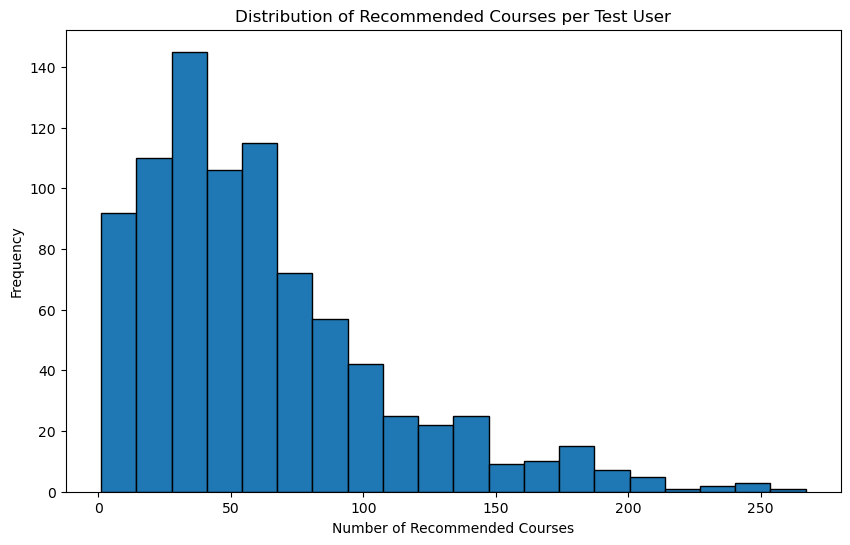

On average, 61.82 new courses have been recommended per test user.


In [47]:
import matplotlib.pyplot as plt

# Calculate the number of recommended courses per test user
courses_per_user = res_df.groupby('USER').size()

# Create a histogram of the number of recommended courses per user
plt.figure(figsize=(10, 6))
plt.hist(courses_per_user, bins=20, edgecolor='black')
plt.xlabel('Number of Recommended Courses')
plt.ylabel('Frequency')
plt.title('Distribution of Recommended Courses per Test User')
plt.show()

# Calculate and print the average number of recommended courses per test user
avg_courses_per_user = courses_per_user.mean()
print(f"On average, {avg_courses_per_user:.2f} new courses have been recommended per test user.")

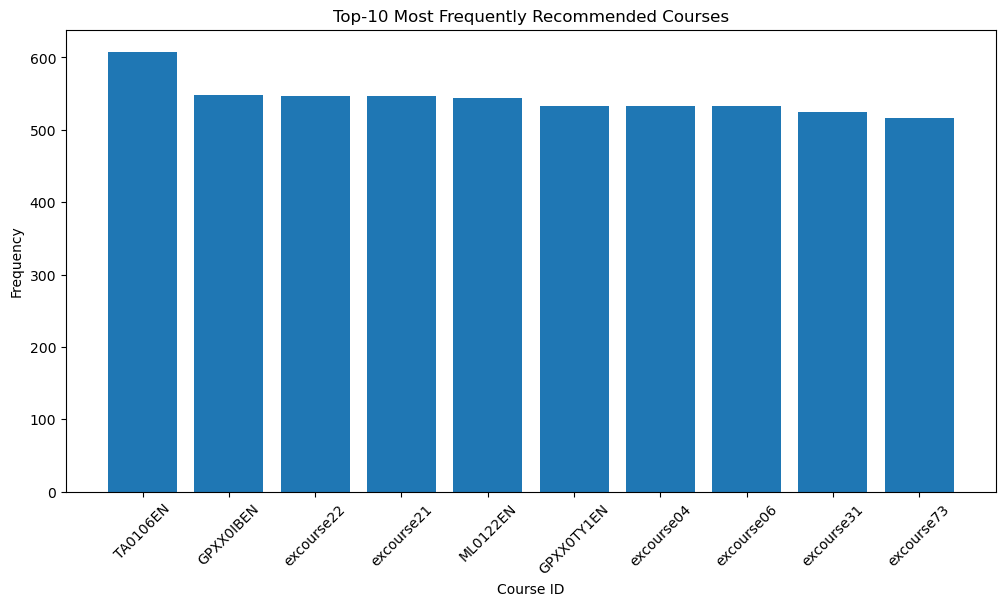

Top-10 most frequently recommended courses:


,Course ID,Frequency
0,TA0106EN,608
1,GPXX0IBEN,548
2,excourse22,547
3,excourse21,547
4,ML0122EN,544
5,GPXX0TY1EN,533
6,excourse04,533
7,excourse06,533
8,excourse31,524
9,excourse73,516


In [54]:
import matplotlib.pyplot as plt

# Find the top-10 most frequently recommended courses
top_10_courses = res_df['COURSE_ID'].value_counts().head(10)

# Create a bar plot of the top-10 most frequently recommended courses
plt.figure(figsize=(12, 6))
plt.bar(top_10_courses.index, top_10_courses.values)
plt.xlabel('Course ID')
plt.ylabel('Frequency')
plt.title('Top-10 Most Frequently Recommended Courses')
plt.xticks(rotation=45)
plt.show()

# Find the top-10 most frequently recommended courses
top_10_courses = res_df['COURSE_ID'].value_counts().head(10)

# Convertir la série en DataFrame
top_10_courses_df = top_10_courses.to_frame().reset_index()

# Renommer les colonnes
top_10_courses_df.columns = ['Course ID', 'Frequency']

# Afficher le DataFrame
print("Top-10 most frequently recommended courses:")
top_10_courses_df


Your recommendation results may look like the following screenshot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/recommendation_scores.png)


With the course recommendation list generated for each test user, you also need to perform some analytic tasks to answer the following two questions:


- On average, how many new courses have been recommended per test user?
- What are the most frequently recommended courses? Return the top-10 commonly recommended courses across all test users.


For example, suppose we have only 3 test users, each user receives the following course recommendations:


- User1: ['course1', 'course2']
- User2: ['course3', 'course4']
- User3: ['course3', 'course4', 'course5']


Then, the average recommended courses per user is: $(2 + 2 + 3) / 3 = 2.33$. The top-2 recommended courses are: `course3`: 2 times, and `course4`: 2 times.


Note that the answers may depend on your score threshold. A lower score threshold yields more recommended courses but with smaller confidence so that some test users may receive very long course recommendation lists and feel overwhelmed. 

Ideally, we should limit the maximum course recommendations to be less than 20 courses per user. As such, the average course recommendations per user should also be less than 20 or so. This makes sure we only recommend relevant courses with high confidence (score).


### Summary


In this lab, you first learned how to generate a user profile vector based on the user's course ratings and course genre vectors. Then, with the user profile generated, you applied a simple dot product between the user profile vector and the course genre vector to generate a course recommendation score. 

The idea is if a user is interested in certain topics (genres) and if a course also has similar topics (genres), which means the user vector and course genre vector share common dimensions, and a dot product is able to capture such similarity.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/)


### Other Contributors


```toggle## Change Log
```


```toggle|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```
```toggle|-|-|-|-|
```
```toggle|2021-10-25|1.0|Yan|Created the initial version|
```
